In [1]:
import pandas as pd
import numpy as np

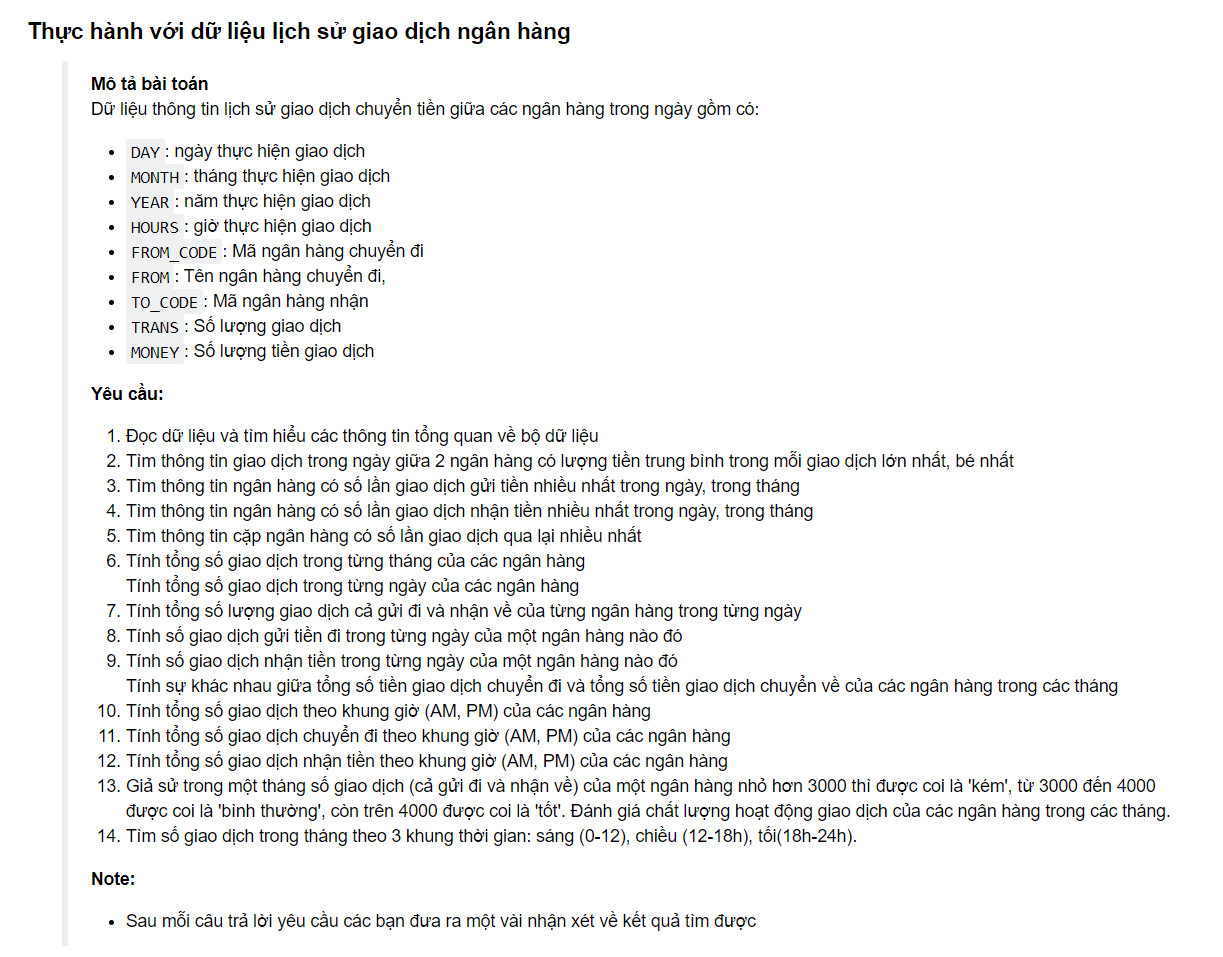

In [2]:
trans = pd.read_csv("D:/DA2210R1/data/bank_transactions.csv")
trans.head()

,DAY,MONTH,YEAR,HOURS,FROM_CODE,FROM,TO_CODE,TRANS,MONEY
0,1,5,2022,1:05:23 PM,ACB,Ngân hàng Á Châu,ABBANK,1125,778000000
1,1,5,2022,2:05:23 PM,ABBANK,Ngân hàng An Bình,OceanBank,1245,1254300000
2,1,5,2022,3:05:23 PM,ANZVL,Ngân hàng ANZ Việt Nam,BIDV,1367,2010421000
3,1,5,2022,4:05:23 PM,OceanBank,Ngân hàng Đại Dương,DongABank,1210,1965643000
4,1,5,2022,5:04:23 PM,GPBank,Ngân hàng dầu khí toàn cầu,SeABank,756,854672000


In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DAY        39 non-null     int64  
 1   MONTH      39 non-null     int64  
 2   YEAR       39 non-null     int64  
 3   DATE       39 non-null     object 
 4   HOURS      39 non-null     object 
 5   FROM_CODE  39 non-null     object 
 6   FROM       39 non-null     object 
 7   TO_CODE    39 non-null     object 
 8   TRANS      39 non-null     int64  
 9   MONEY      39 non-null     int64  
 10  AVG_MONEY  39 non-null     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 3.5+ KB


In [5]:
date = trans["DAY"].apply(str) + "/" + trans["MONTH"].apply(str) + "/" + trans["YEAR"].apply(str)
trans.insert(loc=3, column = "DATE", value = date)
trans["AVG_MONEY"] = (trans["MONEY"] / trans["TRANS"])

In [12]:
trans.head()

,DAY,MONTH,YEAR,DATE,HOURS,FROM_CODE,FROM,TO_CODE,TRANS,MONEY,AVG_MONEY
0,1,5,2022,1/5/2022,1:05:23 PM,ACB,Ngân hàng Á Châu,ABBANK,1125,778000000,6.915556e+05
1,1,5,2022,1/5/2022,2:05:23 PM,ABBANK,Ngân hàng An Bình,OceanBank,1245,1254300000,1.007470e+06
2,1,5,2022,1/5/2022,3:05:23 PM,ANZVL,Ngân hàng ANZ Việt Nam,BIDV,1367,2010421000,1.470681e+06
3,1,5,2022,1/5/2022,4:05:23 PM,OceanBank,Ngân hàng Đại Dương,DongABank,1210,1965643000,1.624498e+06
4,1,5,2022,1/5/2022,5:04:23 PM,GPBank,Ngân hàng dầu khí toàn cầu,SeABank,756,854672000,1.130519e+06


#### 2

In [6]:
max_avg_money = pd.pivot_table(trans, values = "AVG_MONEY", index = ["DATE"], aggfunc = "max")
min_avg_money = pd.pivot_table(trans, values = "AVG_MONEY", index = ["DATE"], aggfunc = "min")

In [7]:
trans[(trans["AVG_MONEY"].isin(max_avg_money["AVG_MONEY"])) | (trans["AVG_MONEY"].isin(min_avg_money["AVG_MONEY"]))]

,DAY,MONTH,YEAR,DATE,HOURS,FROM_CODE,FROM,TO_CODE,TRANS,MONEY,AVG_MONEY
0,1,5,2022,1/5/2022,1:05:23 PM,ACB,Ngân hàng Á Châu,ABBANK,1125,778000000,6.915556e+05
3,1,5,2022,1/5/2022,4:05:23 PM,OceanBank,Ngân hàng Đại Dương,DongABank,1210,1965643000,1.624498e+06
6,1,6,2022,1/6/2022,7:05:43 PM,DongABank,Ngân hàng Đông Á,Vietcombank,875,370324000,4.232274e+05
8,1,6,2022,1/6/2022,9:05:28 PM,MSB,Ngân hàng Hàng Hải,HDBank,234,1696364000,7.249419e+06
9,1,7,2022,1/7/2022,10:05:23 PM,Vietcombank,Ngân hàng Ngoại Thương Việt Nam,VIB,1230,335000000,2.723577e+05
10,2,7,2022,2/7/2022,7:10:45 AM,Agribank,Ngân hàng NN&PT Nông thôn Việt Nam,MB,2021,1405196000,6.952974e+05
11,2,9,2022,2/9/2022,8:14:35 AM,HDBank,Ngân hàng Phát triển TP Hồ Chí Minh,SHB,655,424754000,6.484794e+05
12,2,9,2022,2/9/2022,9:50:39 AM,MB,Ngân hàng Quân đội,TPBank,766,1918320000,2.504334e+06
13,3,9,2022,3/9/2022,11:10:45 AM,VIB,Ngân hàng quốc tế,MSB,931,1263343000,1.356974e+06
14,3,9,2022,3/9/2022,9:07:03 AM,SHB,Ngân hàng Sài Gòn - Hà Nội,SeABank,837,1903641000,2.274362e+06


#### 3

In [23]:
pd.pivot_table(trans, values = ["FROM_CODE","FROM","TRANS"], index = ["DATE"], aggfunc = "max")

,FROM,FROM_CODE,TRANS
DATE,,,
1/5/2022,Ngân hàng Đại Dương,OceanBank,1367
1/6/2022,Ngân hàng Đầu tư và Phát triển Việt Nam,SeABank,2367
1/7/2022,Ngân hàng Ngoại Thương Việt Nam,Vietcombank,1230
10/10/2022,Ngân hàng Phát triển TP Hồ Chí Minh,HDBank,211
10/11/2022,Ngân hàng Quân đội,MB,653
10/12/2022,Ngân hàng Đầu tư và Phát triển Việt Nam,VIB,932
10/9/2022,Ngân hàng Đông Á,DongABank,726
2/7/2022,Ngân hàng NN&PT Nông thôn Việt Nam,Agribank,2021
2/9/2022,Ngân hàng Quân đội,MB,766


In [22]:
pd.pivot_table(trans, values = ["FROM_CODE","FROM","TRANS"], index = ["YEAR", "MONTH"], aggfunc = "max")

FROM    FROM_CODE  TRANS
YEAR MONTH                                                             
2022 2      Ngân hàng Đầu tư và Phát triển Việt Nam    DongABank    805
     3              Ngân hàng Ngoại Thương Việt Nam  Vietcombank    456
     4                             Ngân hàng Á Châu       HDBank   1103
     5                          Ngân hàng Đại Dương    OceanBank   1417
     6      Ngân hàng Đầu tư và Phát triển Việt Nam      SeABank   2367
     7              Ngân hàng Ngoại Thương Việt Nam  Vietcombank   2021
     8      Ngân hàng Đầu tư và Phát triển Việt Nam         BIDV    531
     9                             Ngân hàng Đông Á          VIB    931
     10              Ngân hàng Việt Nam Thịnh Vượng       VPBank   1088
     11                         Ngân hàng Đại Dương    OceanBank   1534
     12     Ngân hàng Đầu tư và Phát triển Việt Nam          VIB    932

#### 4

In [29]:
pd.pivot_table(trans, values = ["TO_CODE", "TRANS"], index = "DATE", aggfunc = "max")

,TO_CODE,TRANS
DATE,,
1/5/2022,SeABank,1367
1/6/2022,Vietcombank,2367
1/7/2022,VIB,1230
10/10/2022,MB,211
10/11/2022,VIB,653
10/12/2022,VIB,932
10/9/2022,VIB,726
2/7/2022,MB,2021
2/9/2022,TPBank,766


In [30]:
pd.pivot_table(trans, values = ["TO_CODE", "TRANS"], index = ["YEAR", "MONTH"], aggfunc = "max")

TO_CODE  TRANS
YEAR MONTH                    
2022 2          SeABank    805
     3           HDBank    456
     4              VIB   1103
     5              VIB   1417
     6      Vietcombank   2367
     7              VIB   2021
     8          SeABank    531
     9              VIB    931
     10       OceanBank   1088
     11             VIB   1534
     12             VIB    932

#### 5

In [21]:
pd.pivot_table(trans, values = "TRANS", index = ["FROM_CODE", "TO_CODE"], aggfunc = "sum").reset_index()

,FROM_CODE,TO_CODE,TRANS
0,ABBANK,DongABank,1100
1,ABBANK,OceanBank,1245
2,ACB,ABBANK,1125
3,ACB,BIDV,1103
4,ANZVL,BIDV,1367
5,ANZVL,SeABank,1302
6,Agribank,MB,2021
7,Agribank,VIB,329
8,BIDV,MB,932
9,BIDV,MSB,2367


#### 6

In [19]:
pd.pivot_table(trans, values = "TRANS", index = ["YEAR", "MONTH", "FROM", "FROM_CODE"], aggfunc = "sum")

TRANS
YEAR MONTH FROM                                    FROM_CODE         
2022 2     Ngân hàng Đông Á                        DongABank      779
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV           805
     3     Ngân hàng Ngoại Thương Việt Nam         Vietcombank    456
     4     Ngân hàng An Bình                       ABBANK        1100
           Ngân hàng NN&PT Nông thôn Việt Nam      Agribank       329
           Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         984
           Ngân hàng Á Châu                        ACB           1103
     5     Ngân hàng ANZ Việt Nam                  ANZVL         2669
           Ngân hàng An Bình                       ABBANK        1245
           Ngân hàng dầu khí toàn cầu              GPBank         756
           Ngân hàng Á Châu                        ACB           1125
           Ngân hàng Đại Dương                     OceanBank     2627
     6     Ngân Hàng Đông Nam Á                    SeABank       2595
           Ngân hàng Hàng Hải                      MSB            234
           Ngân hàng Đông Á                        DongABank      875
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV          2367
     7     Ngân hàng Hàng Hải                      MSB            244
           Ngân hàng NN&PT Nông thôn Việt Nam      Agribank      2021
           Ngân hàng Ngoại Thương Việt Nam         Vietcombank   1230
     8     Ngân hàng Đầu tư và Phát triển Việt Nam BIDV           531
     9     Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         655
           Ngân hàng Quân đội                      MB             766
           Ngân hàng Sài Gòn - Hà Nội              SHB            837
           Ngân hàng quốc tế                       VIB            931
           Ngân hàng Đông Á                        DongABank      726
     10    Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         211
           Ngân hàng Sài Gòn                       SCB            439
           Ngân hàng Tiên Phong                    TPBank         769
           Ngân hàng Việt Nam Thịnh Vượng          VPBank        1088
     11    Ngân hàng Quân đội                      MB             653
           Ngân hàng dầu khí toàn cầu              GPBank        1431
           Ngân hàng Đại Dương                     OceanBank     1534
     12    Ngân hàng Quân đội                      MB             912
           Ngân hàng quốc tế                       VIB            811
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV          1566

In [20]:
pd.pivot_table(trans, values = "TRANS", index = ["DATE", "FROM", "FROM_CODE"], aggfunc = "sum")

TRANS
DATE       FROM                                    FROM_CODE         
1/5/2022   Ngân hàng ANZ Việt Nam                  ANZVL         1367
           Ngân hàng An Bình                       ABBANK        1245
           Ngân hàng dầu khí toàn cầu              GPBank         756
           Ngân hàng Á Châu                        ACB           1125
           Ngân hàng Đại Dương                     OceanBank     1210
1/6/2022   Ngân Hàng Đông Nam Á                    SeABank       1023
           Ngân hàng Hàng Hải                      MSB            234
           Ngân hàng Đông Á                        DongABank      875
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV          2367
1/7/2022   Ngân hàng Ngoại Thương Việt Nam         Vietcombank   1230
10/10/2022 Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         211
10/11/2022 Ngân hàng Quân đội                      MB             653
10/12/2022 Ngân hàng Quân đội                      MB             912
           Ngân hàng quốc tế                       VIB            811
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV          1566
10/9/2022  Ngân hàng Đông Á                        DongABank      726
2/7/2022   Ngân hàng NN&PT Nông thôn Việt Nam      Agribank      2021
2/9/2022   Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         655
           Ngân hàng Quân đội                      MB             766
3/9/2022   Ngân hàng Sài Gòn - Hà Nội              SHB            837
           Ngân hàng quốc tế                       VIB            931
4/10/2022  Ngân hàng Sài Gòn                       SCB            439
           Ngân hàng Tiên Phong                    TPBank         769
           Ngân hàng Việt Nam Thịnh Vượng          VPBank        1088
4/11/2022  Ngân hàng Đại Dương                     OceanBank     1534
5/11/2022  Ngân hàng dầu khí toàn cầu              GPBank        1431
5/2/2022   Ngân hàng Đông Á                        DongABank      779
           Ngân hàng Đầu tư và Phát triển Việt Nam BIDV           805
6/3/2022   Ngân hàng Ngoại Thương Việt Nam         Vietcombank    456
6/4/2022   Ngân hàng NN&PT Nông thôn Việt Nam      Agribank       329
           Ngân hàng Phát triển TP Hồ Chí Minh     HDBank         984
7/4/2022   Ngân hàng An Bình                       ABBANK        1100
           Ngân hàng Á Châu                        ACB           1103
9/5/2022   Ngân hàng ANZ Việt Nam                  ANZVL         1302
           Ngân hàng Đại Dương                     OceanBank     1417
9/6/2022   Ngân Hàng Đông Nam Á                    SeABank       1572
9/7/2022   Ngân hàng Hàng Hải                      MSB            244
9/8/2022   Ngân hàng Đầu tư và Phát triển Việt Nam BIDV           531

#### 7

In [45]:
pd.pivot_table(trans, values = "TRANS", index = ["DATE", "FROM_CODE"], aggfunc = "sum")

TRANS
DATE       FROM_CODE         
1/5/2022   ABBANK        1245
           ACB           1125
           ANZVL         1367
           GPBank         756
           OceanBank     1210
1/6/2022   BIDV          2367
           DongABank      875
           MSB            234
           SeABank       1023
1/7/2022   Vietcombank   1230
10/10/2022 HDBank         211
10/11/2022 MB             653
10/12/2022 BIDV          1566
           MB             912
           VIB            811
10/9/2022  DongABank      726
2/7/2022   Agribank      2021
2/9/2022   HDBank         655
           MB             766
3/9/2022   SHB            837
           VIB            931
4/10/2022  SCB            439
           TPBank         769
           VPBank        1088
4/11/2022  OceanBank     1534
5/11/2022  GPBank        1431
5/2/2022   BIDV           805
           DongABank      779
6/3/2022   Vietcombank    456
6/4/2022   Agribank       329
           HDBank         984
7/4/2022   ABBANK        1100
           ACB           1103
9/5/2022   ANZVL         1302
           OceanBank     1417
9/6/2022   SeABank       1572
9/7/2022   MSB            244
9/8/2022   BIDV           531

In [46]:
pd.pivot_table(trans, values = "TRANS", index = ["DATE", "TO_CODE"], aggfunc = "sum")

TRANS
DATE       TO_CODE           
1/5/2022   ABBANK        1125
           BIDV          1367
           DongABank     1210
           OceanBank     1245
           SeABank        756
1/6/2022   Agribank      1023
           HDBank         234
           MSB           2367
           Vietcombank    875
1/7/2022   VIB           1230
10/10/2022 MB             211
10/11/2022 VIB            653
10/12/2022 ACB            912
           MB            1743
           VIB            634
10/9/2022  VIB            726
2/7/2022   MB            2021
2/9/2022   SHB            655
           TPBank         766
3/9/2022   MSB            931
           SeABank        837
4/10/2022  BIDV          1527
           OceanBank      769
4/11/2022  BIDV          1534
5/11/2022  DongABank     1431
5/2/2022   Agribank       779
           SeABank        805
6/3/2022   HDBank         456
6/4/2022   MB             984
           VIB            329
7/4/2022   BIDV          1103
           DongABank     1100
9/5/2022   SeABank       1302
           VIB           1417
9/6/2022   MB            1572
9/7/2022   MB             244
9/8/2022   SeABank        531

#### 8

In [10]:
pd.pivot_table(trans, values = "TRANS", index = ["FROM_CODE", "DATE"], aggfunc = "sum")

TRANS
FROM_CODE   DATE             
ABBANK      1/5/2022     1245
            7/4/2022     1100
ACB         1/5/2022     1125
            7/4/2022     1103
ANZVL       1/5/2022     1367
            9/5/2022     1302
Agribank    2/7/2022     2021
            6/4/2022      329
BIDV        1/6/2022     2367
            10/12/2022   1566
            5/2/2022      805
            9/8/2022      531
DongABank   1/6/2022      875
            10/9/2022     726
            5/2/2022      779
GPBank      1/5/2022      756
            5/11/2022    1431
HDBank      10/10/2022    211
            2/9/2022      655
            6/4/2022      984
MB          10/11/2022    653
            10/12/2022    912
            2/9/2022      766
MSB         1/6/2022      234
            9/7/2022      244
OceanBank   1/5/2022     1210
            4/11/2022    1534
            9/5/2022     1417
SCB         4/10/2022     439
SHB         3/9/2022      837
SeABank     1/6/2022     1023
            9/6/2022     1572
TPBank      4/10/2022     769
VIB         10/12/2022    811
            3/9/2022      931
VPBank      4/10/2022    1088
Vietcombank 1/7/2022     1230
            6/3/2022      456

#### 9

In [11]:
pd.pivot_table(trans, values = "TRANS", index = ["TO_CODE", "DATE"], aggfunc = "sum")

TRANS
TO_CODE     DATE             
ABBANK      1/5/2022     1125
ACB         10/12/2022    912
Agribank    1/6/2022     1023
            5/2/2022      779
BIDV        1/5/2022     1367
            4/10/2022    1527
            4/11/2022    1534
            7/4/2022     1103
DongABank   1/5/2022     1210
            5/11/2022    1431
            7/4/2022     1100
HDBank      1/6/2022      234
            6/3/2022      456
MB          10/10/2022    211
            10/12/2022   1743
            2/7/2022     2021
            6/4/2022      984
            9/6/2022     1572
            9/7/2022      244
MSB         1/6/2022     2367
            3/9/2022      931
OceanBank   1/5/2022     1245
            4/10/2022     769
SHB         2/9/2022      655
SeABank     1/5/2022      756
            3/9/2022      837
            5/2/2022      805
            9/5/2022     1302
            9/8/2022      531
TPBank      2/9/2022      766
VIB         1/7/2022     1230
            10/11/2022    653
            10/12/2022    634
            10/9/2022     726
            6/4/2022      329
            9/5/2022     1417
Vietcombank 1/6/2022      875

#### 10